In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Creating the function that will be used to converrt the image to array format

In [67]:
def convert_image_to_array(image):
    try:
        image = cv2.imread(image)
        if image is not None:
            image  = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return None
    except Exception as e:
        print(f"Error converting image to array {e}")
        return None

# Making the path to our dataset files

In [68]:
import os

path = "../datasets/cats_and_dogs/"
root_dir = os.listdir(path)
image_list, label_list = [], []
all_labels = ["Cat", "Dog"]
binary_labels = [0, 1]
temp = -1

# Looping through each folder in the dataset
for directory in root_dir:
    # Checking if the directory is a label
    if directory in all_labels:
        temp += 1
        folder_path = os.path.join(path, directory)  # Full path to the label folder
        # Looping each image in the folder and adding it to the list and label
        for image in os.listdir(folder_path):  # Listing images in the current folder
            image_path = os.path.join(folder_path, image)  # Full path to the image
            # Appending the image and its label to their lists
            image_list.append(convert_image_to_array(image_path))
            label_list.append(binary_labels[temp])

KeyboardInterrupt: 

# Diaplaying some of the Image Picture  and their label

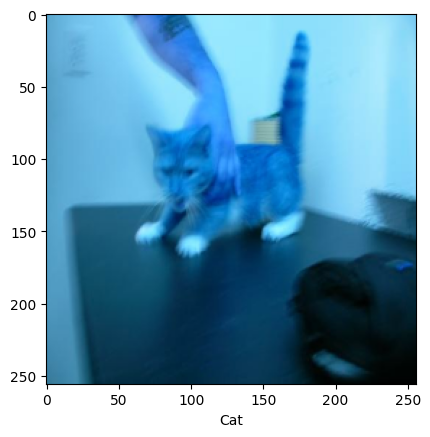

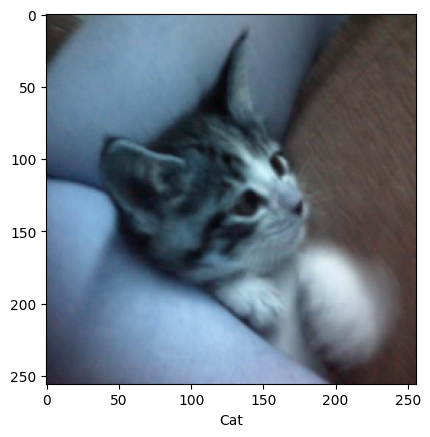

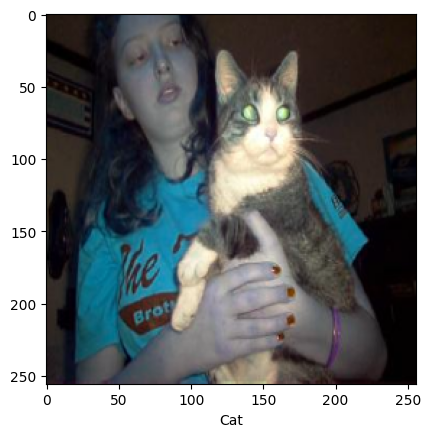

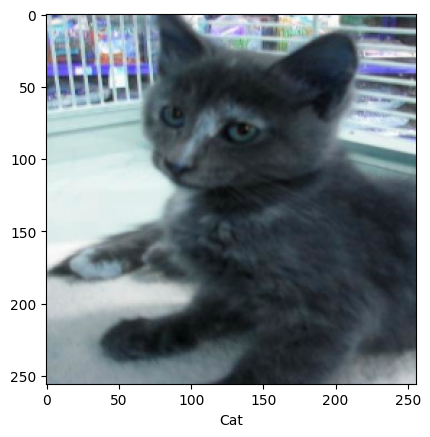

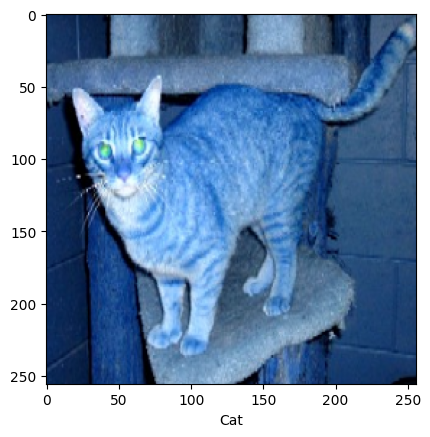

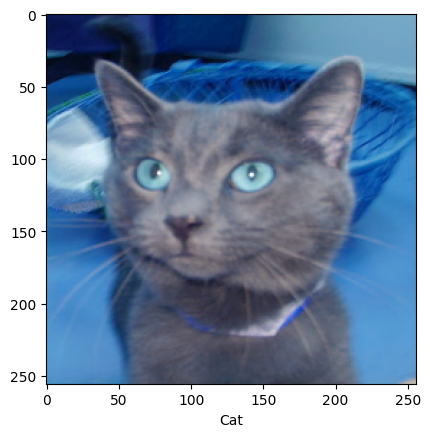

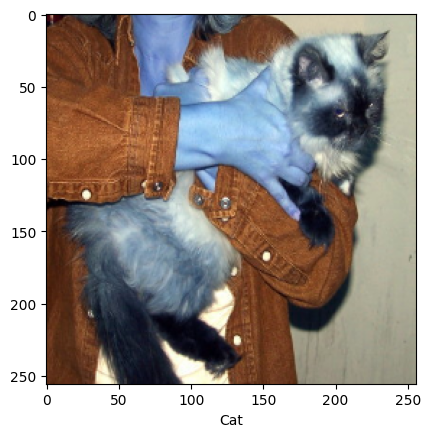

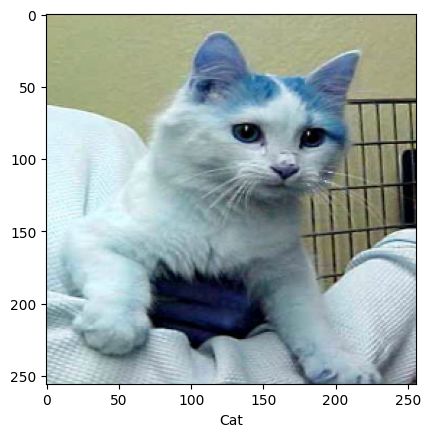

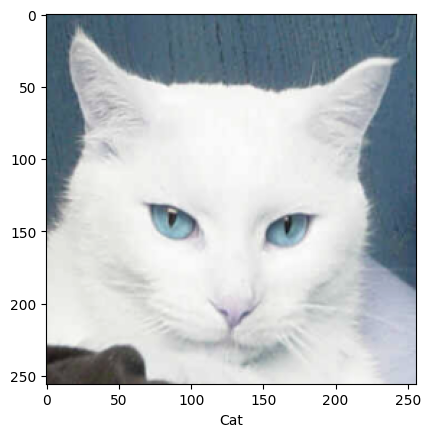

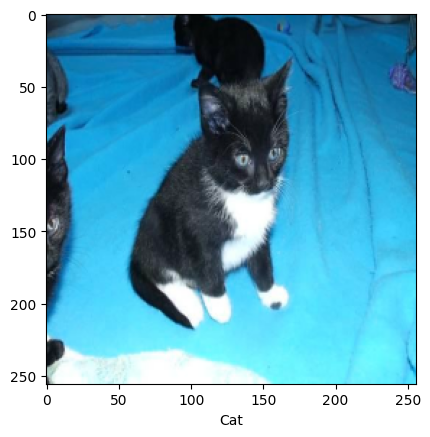

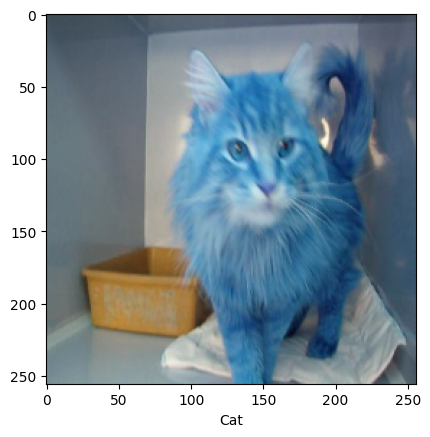

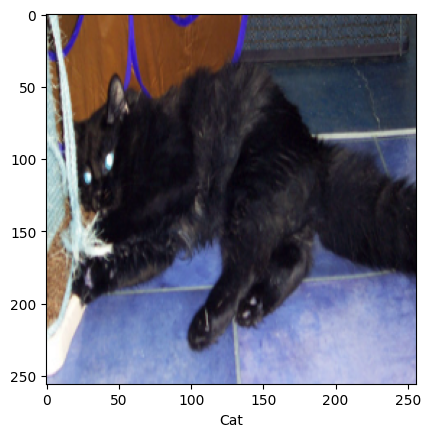

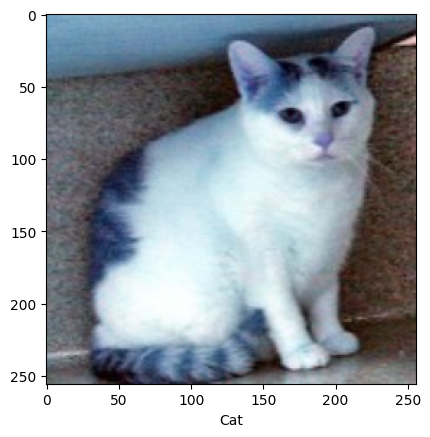

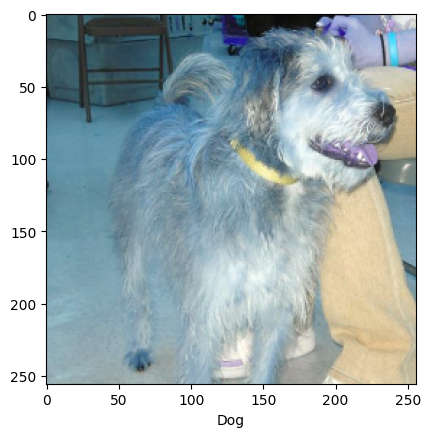

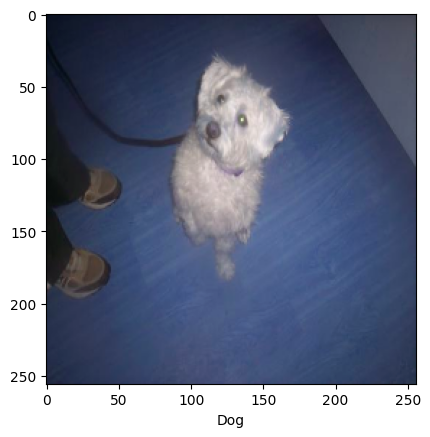

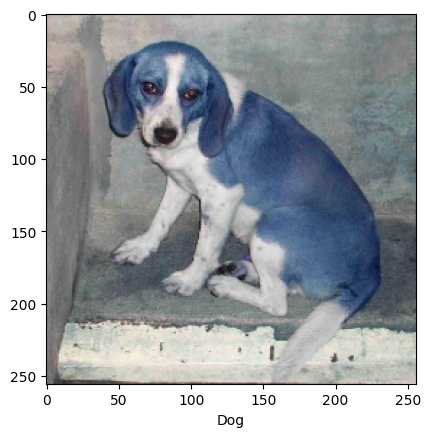

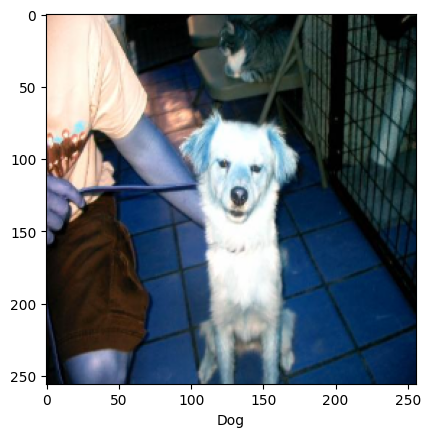

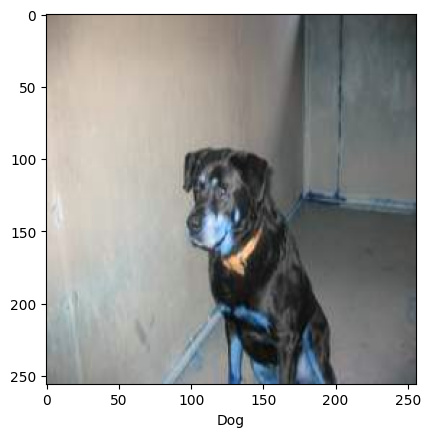

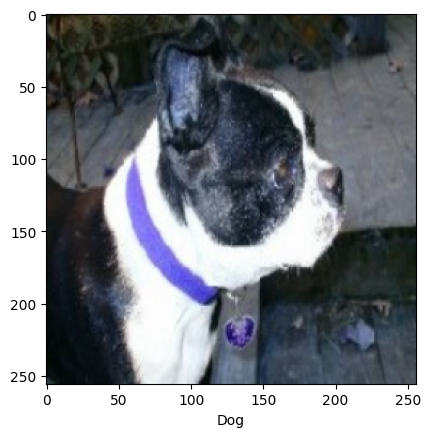

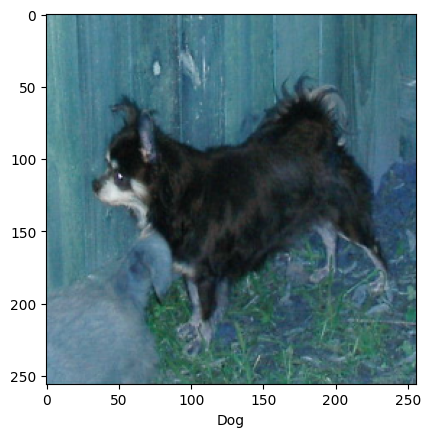

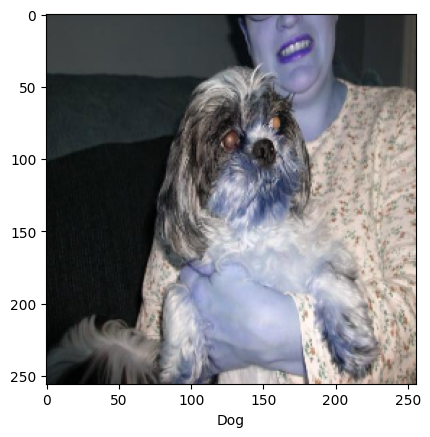

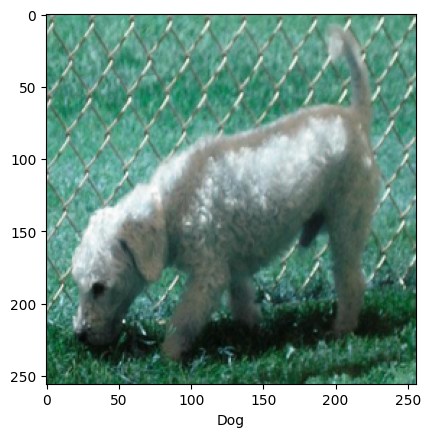

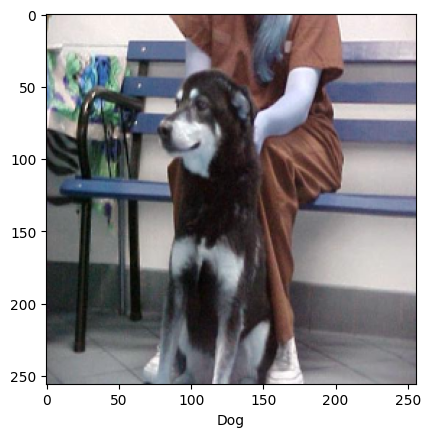

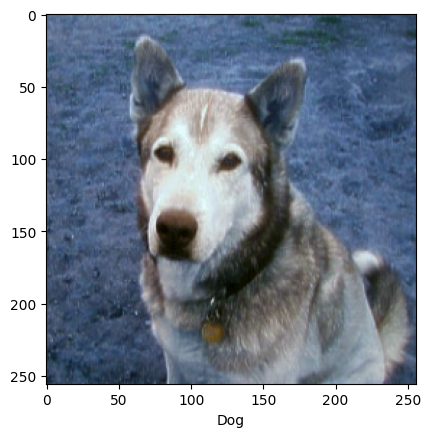

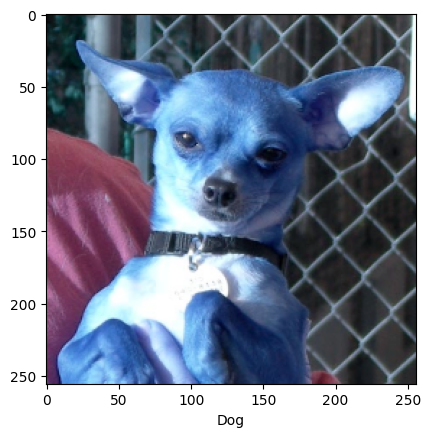

In [ ]:
point = 0
for _ in range(len(image_list)):  # Loop over the length of the image list
    img = array_to_img(image_list[point]) # Access the image from image_list
    label = label_list[point]  # Get the corresponding label
    plt.imshow(img)  # Display the image
    plt.xlabel(all_labels[label])  # Display the label
    plt.show()  # Show the plot
    point += 1000  # Increment point
    if point >= len(image_list):  # Break when all images are displayed
        break

# Checking the length of the image list and the label list

In [ ]:
print(f"Image list is {len(image_list)} images")
print(f"Label list is {len(label_list)} labels")
image_list[0].shape

Image list is 24961 images
Label list is 24961 labels


(256, 256, 3)

# Splitting the dataset for training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Resizing the images to the same shape before normalizing them

# Normalizing the x_train and x_test

In [ ]:
import cv2
import numpy as np

def preprocess_images_with_cv2(data, target_size):
    processed_data = []
    for img in data:
        try:
            # Reshape if necessary (e.g., if it's a flat array or has extra dimensions)
            if len(img.shape) < 3 or img.shape[-1] == 1:
                img = np.squeeze(img)  # Remove unnecessary dimensions
            
            # Ensure image data is in uint8 format
            if img.dtype != np.uint8:
                img = (img * 255).astype(np.uint8)
            
            # Resize image using cv2
            resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
            
            # Ensure 3 channels (convert grayscale to RGB if needed)
            if len(resized_img.shape) == 2:  # Grayscale
                resized_img = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
            
            processed_data.append(resized_img)
        except Exception as e:
            print(f"Skipped an element due to error: {e}")
    return np.array(processed_data)

# Assuming x_train is loaded as a list/array of images
target_size = (256, 256)  # Resize to 256x256
x_train = preprocess_images_with_cv2(x_train, target_size)


Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an element due to error: 'NoneType' object has no attribute 'shape'
Skipped an e

In [ ]:
x_test = preprocess_images_with_cv2(x_test, target_size)

# Convertaing the x and y test to categorical

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Creating the network architecture for the model

In [71]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

c:\Users\DELL\Desktop\MachineLearning\SpecialForCreatingModel\env_ForCreatingModel\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,225,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model

In [72]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Spliting the dataset into the training and validation sets

In [73]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [19929, 19968]